In [1]:
'''age - age in years
gender - (1 = male; 0 = female)
cp - chest pain type
trestbps - resting blood pressure (in mm Hg on admission to the hospital)
chol - serum cholestoral in mg/dl
fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg - resting electrocardiographic results
thalach - maximum heart rate achieved
exang - exercise induced angina (1 = yes; 0 = no)
oldpeak - ST depression induced by exercise relative to rest
slope - the slope of the peak exercise ST segment
ca - number of major vessels (0-3) colored by flourosopy
thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
target - have disease or not (1=yes, 0=no)'''

'age - age in years\ngender - (1 = male; 0 = female)\ncp - chest pain type\ntrestbps - resting blood pressure (in mm Hg on admission to the hospital)\nchol - serum cholestoral in mg/dl\nfbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\nrestecg - resting electrocardiographic results\nthalach - maximum heart rate achieved\nexang - exercise induced angina (1 = yes; 0 = no)\noldpeak - ST depression induced by exercise relative to rest\nslope - the slope of the peak exercise ST segment\nca - number of major vessels (0-3) colored by flourosopy\nthal - 3 = normal; 6 = fixed defect; 7 = reversable defect\ntarget - have disease or not (1=yes, 0=no)'

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
%matplotlib inline
import seaborn as sns
#import random

In [6]:
data = pd.read_csv("heart.csv")

In [7]:
data.isnull().sum()

age         0
gender      0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.describe()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.corr()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


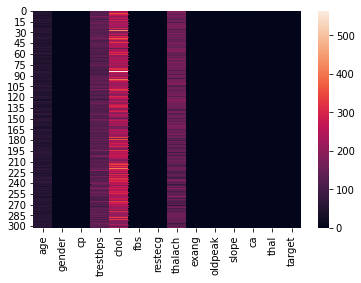

In [10]:
sns.heatmap(data)

In [11]:
data.cov()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,82.484558,-0.416661,-0.643499,44.495902,100.585076,0.392433,-0.555013,-82.903318,0.413022,2.214583,-0.944791,2.566356,0.378139,-1.021343
gender,-0.416661,0.217166,-0.023736,-0.463970,-4.780309,0.007475,-0.014261,-0.469871,0.031014,0.051993,-0.008819,0.056357,0.059930,-0.065307
cp,-0.643499,-0.023736,1.065132,0.861714,-4.113774,0.034719,0.024108,6.991618,-0.191168,-0.178821,0.076137,-0.191080,-0.102201,0.223330
trestbps,44.495902,-0.463970,0.861714,307.586453,111.967215,1.109042,-1.052324,-18.759131,0.557111,3.934486,-1.312832,1.818373,0.668022,-1.267950
chol,100.585076,-4.780309,-4.113774,111.967215,2686.426748,0.245427,-4.116703,-11.800494,1.631991,3.246794,-0.128964,3.737252,3.135488,-2.203855
fbs,0.392433,0.007475,0.034719,1.109042,0.245427,0.126877,-0.015769,-0.069897,0.004295,0.002377,-0.013147,0.050259,-0.006983,-0.004983
restecg,-0.555013,-0.014261,0.024108,-1.052324,-4.116703,-0.015769,0.276528,0.531462,-0.017474,-0.035883,0.030151,-0.038741,-0.003858,0.035998
thalach,-82.903318,-0.469871,6.991618,-18.759131,-11.800494,-0.069897,0.531462,524.646406,-4.076290,-9.153518,5.459369,-4.993235,-1.352491,4.818766
exang,0.413022,0.031014,-0.191168,0.557111,1.631991,0.004295,-0.017474,-4.076290,0.220707,0.157216,-0.074618,0.055603,0.059472,-0.102354
oldpeak,2.214583,0.051993,-0.178821,3.934486,3.246794,0.002377,-0.035883,-9.153518,0.157216,1.348095,-0.413219,0.264396,0.149462,-0.249452


age


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


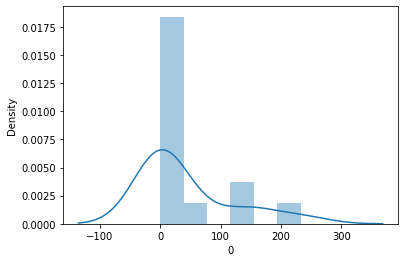

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


gender


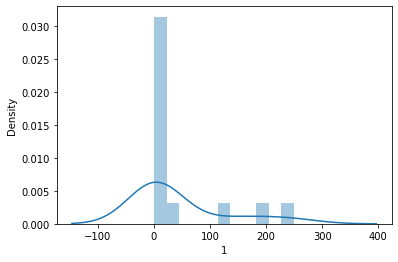

cp


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


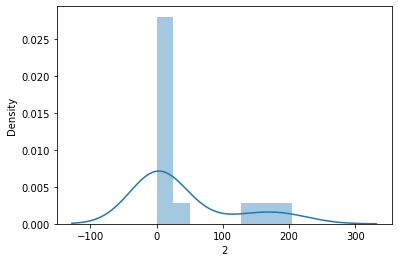

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


trestbps


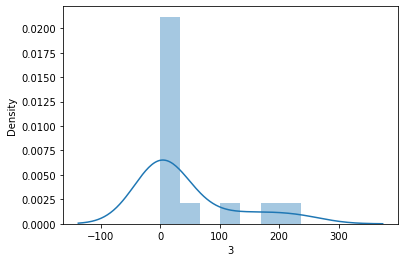

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


chol


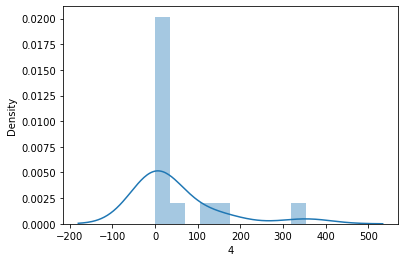

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


fbs


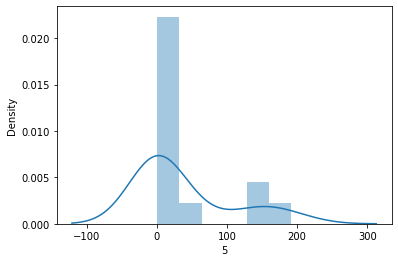

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


restecg


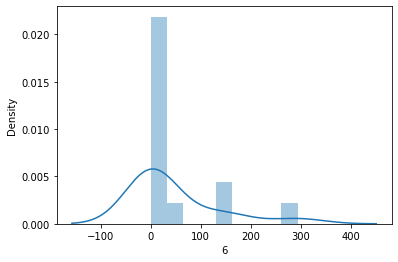

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


thalach


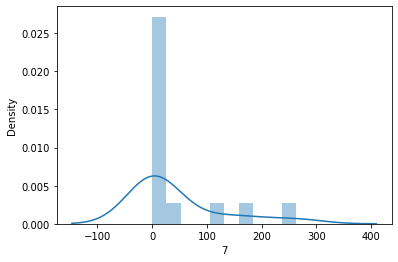

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


exang


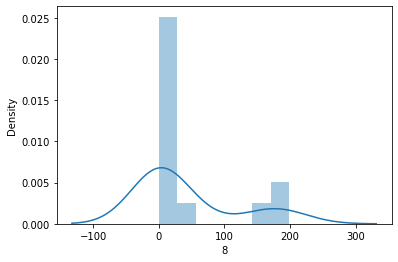

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


oldpeak


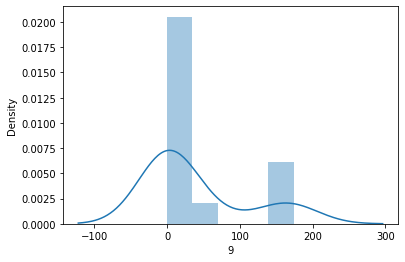

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


slope


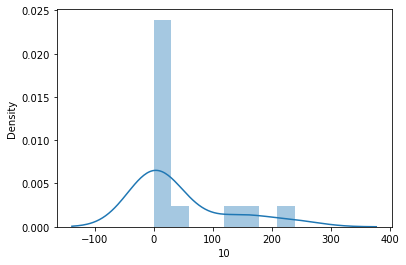

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


ca


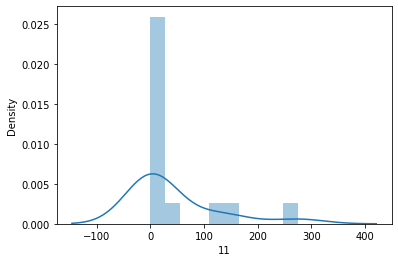

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


thal


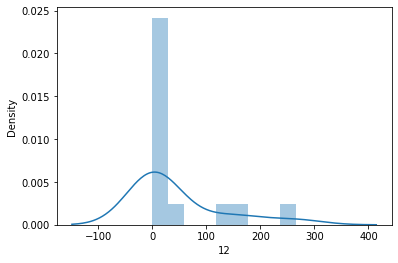

In [12]:
for i in range(13):
    sns.distplot(data.iloc[i])
    print(data.columns[i])
    plt.show()

In [13]:
mean_target = data['target'].mean()

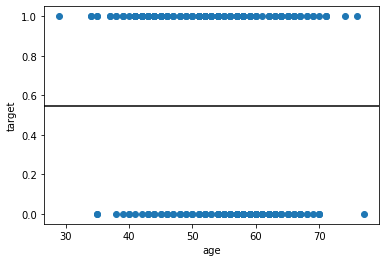

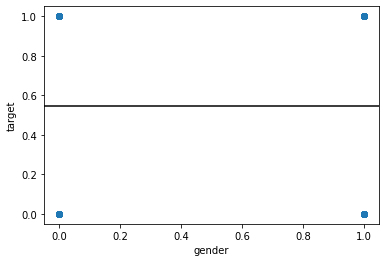

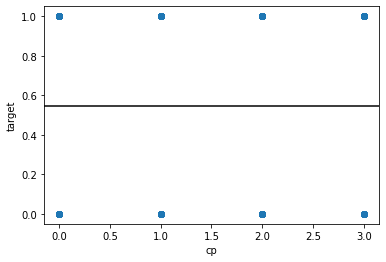

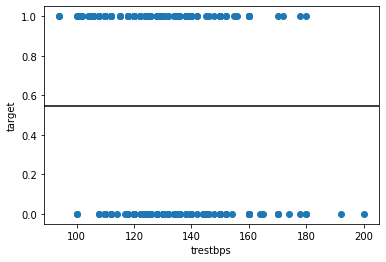

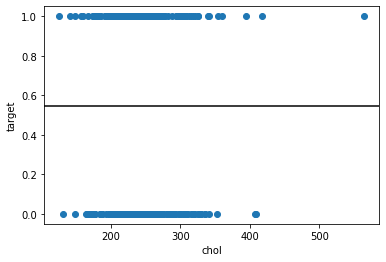

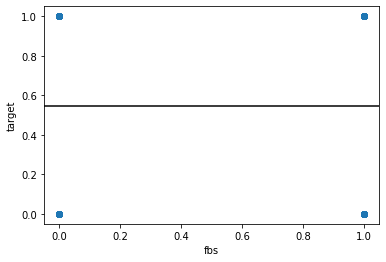

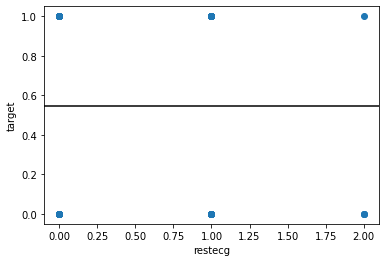

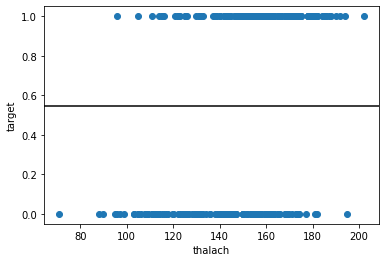

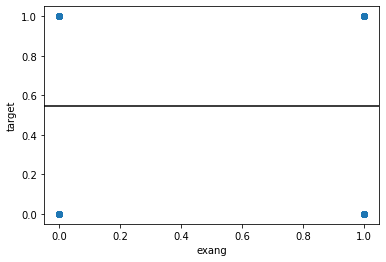

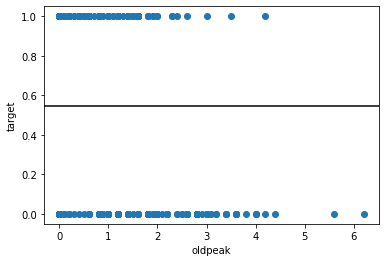

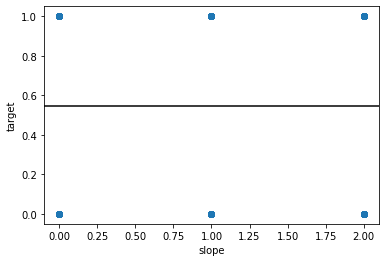

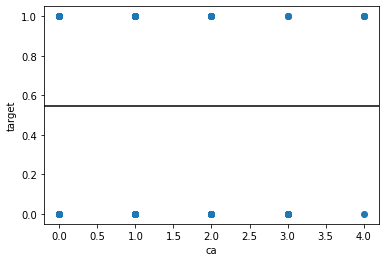

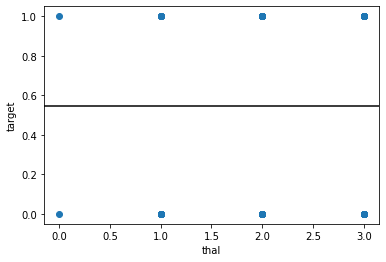

In [14]:
l = data.columns
for i in l[:-1]:
    #print(i)
    plt.scatter(data[i],data['target'])
    plt.xlabel(i)
    plt.ylabel('target')
    plt.axhline(mean_target,color='k')
    plt.show()

In [15]:
x = data.iloc[:,0:13]
y = data.iloc[:,13]

In [16]:
from sklearn import preprocessing
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.70833333, 1.        , 1.        , ..., 0.        , 0.        ,
        0.33333333],
       [0.16666667, 1.        , 0.66666667, ..., 0.        , 0.        ,
        0.66666667],
       [0.25      , 0.        , 0.33333333, ..., 1.        , 0.        ,
        0.66666667],
       ...,
       [0.8125    , 1.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ],
       [0.58333333, 1.        , 0.        , ..., 0.5       , 0.25      ,
        1.        ],
       [0.58333333, 0.        , 0.33333333, ..., 0.5       , 0.25      ,
        0.66666667]])

In [17]:
x.head()

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [18]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33)

In [20]:
x_train

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2
83,52,1,3,152,298,1,1,178,0,1.2,1,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2


In [21]:
x_test 

,age,gender,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3
242,64,1,0,145,212,0,0,132,0,2.0,1,2,1
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
150,66,1,0,160,228,0,0,138,0,2.3,2,0,1
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3


In [22]:
y_train

99     1
293    0
3      1
228    0
282    0
      ..
127    1
83     1
8      1
302    0
51     1
Name: target, Length: 203, dtype: int64

In [70]:
y_test

42     1
201    0
242    0
166    0
71     1
      ..
176    0
150    1
168    0
188    0
94     1
Name: target, Length: 100, dtype: int64

# SVM


In [71]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf',probability = True)
svc_classifier = svc.fit(x_train,y_train)

In [72]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [73]:
from sklearn.model_selection import cross_val_score,cross_val_predict
svc_acc = cross_val_score(svc_classifier, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
svc_proba = cross_val_predict(svc_classifier, x_train_std, y_train, cv=3, method='predict_proba')
svc_scores = svc_proba[:, 1]

In [74]:
y_pred=svc_classifier.predict(x_test)

In [75]:
print("actual values:\n")
print(y_test.values)

actual values:

[1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1
 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1]


In [76]:
print("predicted values:\n")
print(y_pred)

predicted values:

[1 1 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1
 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 1 0
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1]


In [77]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 61.000000
Recall score : 82.352941
ROC score : 60.564226

[[19 30]
 [ 9 42]]


# KNN

In [78]:
from sklearn import neighbors

In [79]:
clf = neighbors.KNeighborsClassifier()
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [80]:
y_pred=clf.predict(x_test)

In [81]:
print("Actual values : ")
print(y_test.values)

Actual values : 
[1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1
 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1]


In [82]:
print("Predicted values : ")
print(y_pred)

Predicted values : 
[1 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1
 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 1 0
 1 1 1 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 1 1]


In [83]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 61.000000
Recall score : 64.705882
ROC score : 60.924370

[[28 21]
 [18 33]]


In [84]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)
clf_acc = cross_val_score(clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
clf_proba = cross_val_predict(clf, x_train_std, y_train, cv=3, method='predict_proba')
clf_scores = clf_proba[:, 1] 

# DECISION TREE

In [85]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [86]:
dtc_clf_acc = cross_val_score(dtc_clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc_clf, x_train_std, y_train, cv=3, method='predict_proba')
dtc_clf_scores = dtc_proba[:, 1]

In [87]:
y_pred=dtc_clf.predict(x_test)

In [88]:
print("Actual values : ")
print(y_test.values)

Actual values : 
[1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1
 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1]


In [89]:
print("Predicted values : ")
print(y_pred)

Predicted values : 
[0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1
 1 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 1 1
 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 1]


In [90]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 77.000000
Recall score : 64.705882
ROC score : 77.250900

[[44  5]
 [18 33]]


# RANDOM FOREST

In [91]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=5, random_state=0)
rmf_clf = rmf.fit(x_train, y_train)

In [92]:
rmf_clf_acc = cross_val_score(rmf_clf, x_train_std, y_train, cv=3, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rmf_clf, x_train_std, y_train, cv=3, method='predict_proba')
rmf_clf_scores = rmf_proba[:, 1]

In [93]:
y_pred=rmf_clf.predict(x_test)

In [94]:
print("Actual values : ")
print(y_test.values)

Actual values : 
[1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1
 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1]


In [95]:
print("Predicted values : ")
print(y_pred)

Predicted values : 
[0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1
 1 1 1 0 0 1 0 0 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1
 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 1]


In [96]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 82.000000
Recall score : 86.274510
ROC score : 81.912765

[[38 11]
 [ 7 44]]


In [97]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_acc = cross_val_score(lr, x_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, x_train_std, y_train, cv=3, method='predict_proba')
lr_scores = lr_proba[:, 1]

In [98]:
y_pred=lr.predict(x_test)

In [99]:
print("Actual values : ")
print(y_test.values)

Actual values : 
[1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1
 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1]


In [100]:
print("Predicted values : ")
print(y_pred)

Predicted values : 
[1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1]


In [101]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 52.000000
Recall score : 92.156863
ROC score : 51.180472

[[ 5 44]
 [ 4 47]]


 # Naive Bayes Classification

In [102]:
from sklearn.naive_bayes import GaussianNB
nb_classifier =GaussianNB()
nb_classifier.fit(x_train, y_train)
nb_acc = cross_val_score(nb_classifier, x_train_std, y_train, cv=3, scoring='accuracy', n_jobs=-1)
nb_proba = cross_val_predict(nb_classifier, x_train_std, y_train, cv=3, method='predict_proba')
nb_scores = nb_proba[:, 1]
nb_proba

array([[1.64963025e-01, 8.35036975e-01],
       [2.25149908e-01, 7.74850092e-01],
       [6.09438595e-03, 9.93905614e-01],
       [5.31538087e-02, 9.46846191e-01],
       [9.87627676e-01, 1.23723244e-02],
       [5.09815716e-01, 4.90184284e-01],
       [4.20297735e-03, 9.95797023e-01],
       [2.97901739e-03, 9.97020983e-01],
       [4.91749106e-02, 9.50825089e-01],
       [2.92758119e-01, 7.07241881e-01],
       [3.11098925e-03, 9.96889011e-01],
       [1.35207897e-01, 8.64792103e-01],
       [3.09844566e-02, 9.69015543e-01],
       [1.15139243e-03, 9.98848608e-01],
       [8.72016955e-01, 1.27983045e-01],
       [8.52474565e-01, 1.47525435e-01],
       [1.76118092e-02, 9.82388191e-01],
       [9.99477793e-01, 5.22207130e-04],
       [5.04699915e-01, 4.95300085e-01],
       [7.22853404e-01, 2.77146596e-01],
       [9.98461812e-01, 1.53818829e-03],
       [9.99949830e-01, 5.01700696e-05],
       [1.41331645e-02, 9.85866835e-01],
       [1.65012013e-02, 9.83498799e-01],
       [2.127305

In [103]:
y_pred=nb_classifier.predict(x_test)

In [104]:
print("Actual values : ")
print(y_test.values)

Actual values : 
[1 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1
 1 1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0
 0 0 1 1 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1]


In [105]:
print("Predicted values : ")
print(y_pred)

Predicted values : 
[0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 1
 0 1 1 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1
 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 1 1]


In [106]:
print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 76.000000
Recall score : 80.392157
ROC score : 75.910364

[[35 14]
 [10 41]]


In [107]:
from sklearn.metrics import roc_auc_score,roc_curve
def ROC_curve(title, y_train, scores, label=None):
    fpr, tpr, thresholds = roc_curve(y_train, scores)
    print('AUC Score ({}): {:.2f} '.format(title, roc_auc_score(y_train, scores)))
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='b')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (kNN): 0.85 


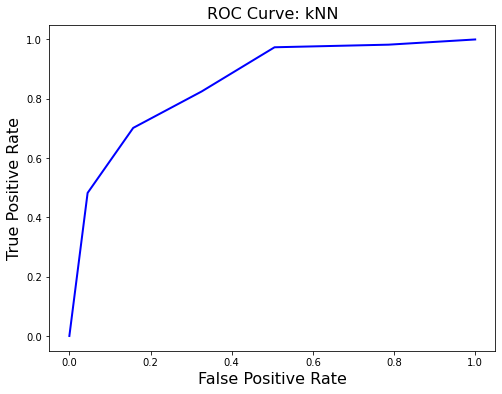

AUC Score (Logistic Regression): 0.91 


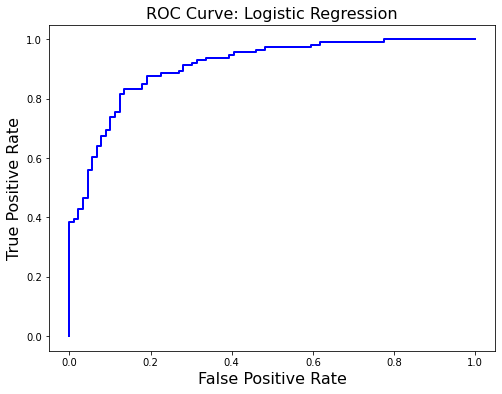

AUC Score (Naive Bayes): 0.90 


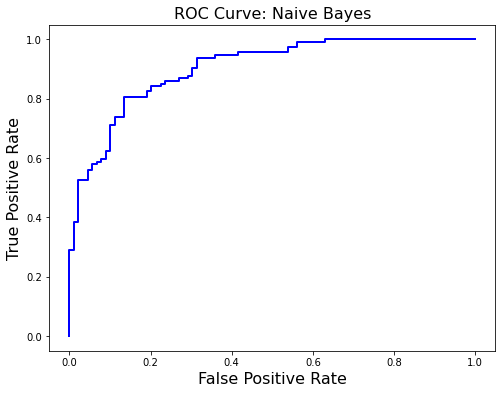

AUC Score (Support Vector Classification): 0.90 


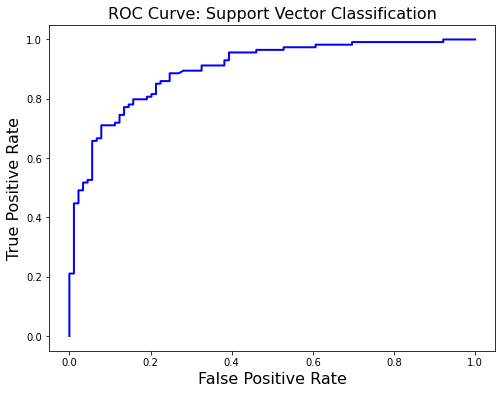

AUC Score (Decision Tree Classifier): 0.70 


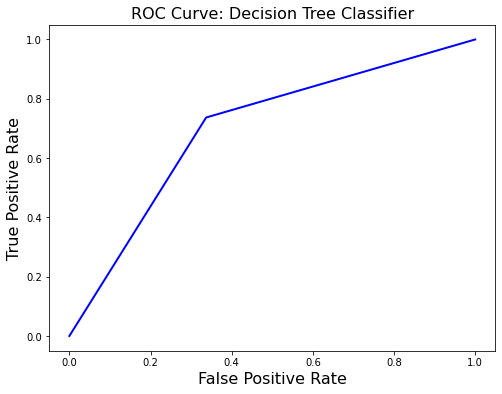

AUC Score (Random Forest Classifier): 0.89 


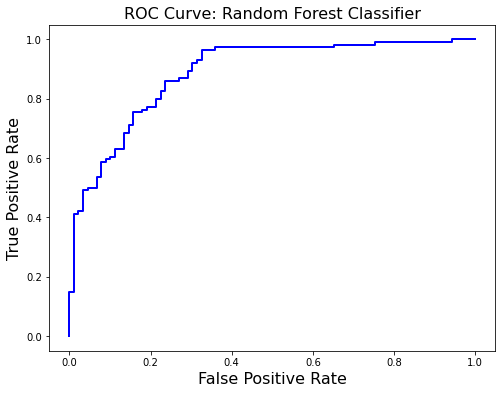

In [108]:
ROC_curve('kNN', y_train, clf_scores)
ROC_curve('Logistic Regression', y_train, lr_scores)
ROC_curve('Naive Bayes',y_train,nb_scores)
ROC_curve('Support Vector Classification',y_train,svc_scores)
ROC_curve('Decision Tree Classifier',y_train,dtc_clf_scores)
ROC_curve('Random Forest Classifier',y_train,rmf_clf_scores)

In [109]:
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow import keras
#model = keras.models.Sequential()
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

In [110]:
x_train = keras.utils.normalize(x_train,axis=1)
x_test = keras.utils.normalize(x_test,axis=1)

In [111]:
'''model.add(keras.layers.Flatten(input_shape = data.shape))
model.add(keras.layers.Dense(128,activation = tf.nn.relu))
model.add(keras.layers.Dense(2,activation = tf.nn.softmax))'''

'model.add(keras.layers.Flatten(input_shape = data.shape))\nmodel.add(keras.layers.Dense(128,activation = tf.nn.relu))\nmodel.add(keras.layers.Dense(2,activation = tf.nn.softmax))'

In [112]:
from tensorflow.keras.layers import Dense
classifier = keras.models.Sequential()
classifier.add(Dense(303, activation='relu', kernel_initializer='random_normal', input_dim=13))
classifier.add(Dense(4, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [113]:
classifier.compile(optimizer ='sgd',loss='binary_crossentropy', metrics =['accuracy'])
classifier.fit(x_train,y_train, batch_size=10, epochs=100)

Train on 203 samples
Epoch 1/100
203/203 [==============================] - 0s 193us/sample - loss: 0.6928 - acc: 0.5616
Epoch 2/100
203/203 [==============================] - 0s 176us/sample - loss: 0.6921 - acc: 0.5616
Epoch 3/100
203/203 [==============================] - 0s 180us/sample - loss: 0.6913 - acc: 0.5616
Epoch 4/100
203/203 [==============================] - 0s 178us/sample - loss: 0.6909 - acc: 0.5616
Epoch 5/100
203/203 [==============================] - 0s 169us/sample - loss: 0.6904 - acc: 0.5616
Epoch 6/100
203/203 [==============================] - 0s 175us/sample - loss: 0.6898 - acc: 0.5616
Epoch 7/100
203/203 [==============================] - 0s 172us/sample - loss: 0.6895 - acc: 0.5616
Epoch 8/100
203/203 [==============================] - 0s 174us/sample - loss: 0.6892 - acc: 0.5616
Epoch 9/100
203/203 [==============================] - 0s 180us/sample - loss: 0.6888 - acc: 0.5616
Epoch 10/100
203/203 [==============================] - 0s 210us/sample - loss:

In [114]:
eval_model=classifier.evaluate(x_train, y_train)
eval_model

[0.6854409378737651, 0.56157637]

In [115]:
y_pred=classifier.predict(x_test)

In [116]:
y_pred

array([[0.5628186 ],
       [0.5626796 ],
       [0.5626234 ],
       [0.56267905],
       [0.56285244],
       [0.5626744 ],
       [0.5625213 ],
       [0.5625497 ],
       [0.5625734 ],
       [0.5628373 ],
       [0.5626424 ],
       [0.5626374 ],
       [0.5627285 ],
       [0.56249267],
       [0.5624955 ],
       [0.5628428 ],
       [0.5627691 ],
       [0.56270456],
       [0.5626463 ],
       [0.5627773 ],
       [0.56269014],
       [0.56274724],
       [0.5624529 ],
       [0.56262124],
       [0.562742  ],
       [0.56252056],
       [0.56267893],
       [0.5625235 ],
       [0.56281424],
       [0.56280905],
       [0.56280446],
       [0.56253797],
       [0.5625268 ],
       [0.56247115],
       [0.5625049 ],
       [0.5625127 ],
       [0.5628204 ],
       [0.5628085 ],
       [0.562791  ],
       [0.5627878 ],
       [0.562501  ],
       [0.56257385],
       [0.5628216 ],
       [0.5626639 ],
       [0.5626746 ],
       [0.56267196],
       [0.56263787],
       [0.562